# Ressonância em Circuitos RLC

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit

In [224]:
sns.set_theme()

## Circuito 1 ($R=1k\Omega$)

In [234]:
def func(x, w0, g0, R): return np.sqrt(((w0**2 - x**2) / (x * g0))**2 + 1)**(-1) / R

In [235]:
df = pd.read_csv('data_1kohm.txt')

In [236]:
R, L, C = 1000, 27E-3, 0.47E-6
w0, g0 = 1 / (2 * np.pi * np.sqrt(L * C)), R / L
Vm = np.max(df['Tensao (V)'])

In [237]:
g0

37037.03703703704

In [238]:
def ressonance(w, R, w0, g0): return Vm / (R * np.sqrt( 1 + ( (w**2 - w0**2)/(w * g0) )**2 ))

In [239]:
data = df.loc[(df['Frequencia (Hz)'] > 1E2) & (df['Frequencia (Hz)'] < 1E4)]

In [247]:
popt, pcov = curve_fit(
	ressonance,
	xdata=data['Frequencia (Hz)'],
	ydata=data['Corrente (A)'],
	p0=[ R, w0, g0 ]
)

In [248]:
np.sqrt(pcov)

/tmp/ipykernel_9781/3743271416.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(pcov)


array([[25.51898826,  2.20228637, 42.13471116],
       [ 2.20228637, 27.49248015,         nan],
       [42.13471116,         nan, 97.96862067]])

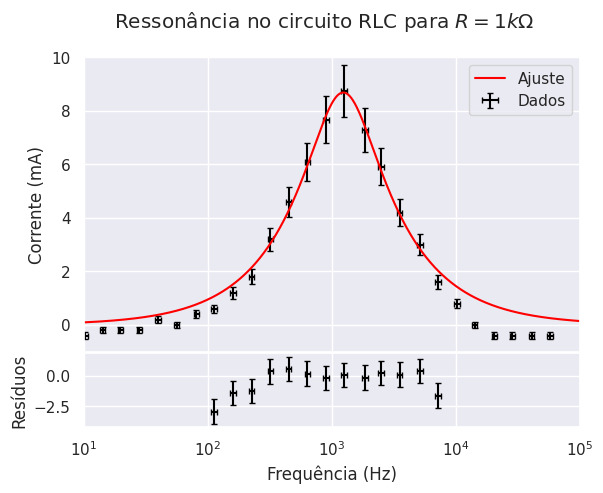

In [249]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1), 'hspace': 0.01 })
plt.suptitle('Ressonância no circuito RLC para $R=1k\\Omega$')

# Plot principcal
axs[0].errorbar(
	x=df['Frequencia (Hz)'],
	y=df['Corrente (A)'] * 1E3,
	xerr=df['Frequencia (Hz)']*0.05,
	yerr=df['Inc. Corrente (A)'] * 1E3,
	fmt=' ', marker=' ', color='black', label='Dados', capsize=2
)

x = np.logspace(1, 5, 1000)
sns.lineplot(x=x, y=ressonance(x, popt[0], popt[1], popt[2]) * 1E3, color='red', label='Ajuste', ax=axs[0])

# Resíduos
axs[1].errorbar(
	x=data['Frequencia (Hz)'],
	y=(data['Corrente (A)'] - ressonance(data['Frequencia (Hz)'], popt[0], popt[1], popt[2])) / data['Inc. Corrente (A)'],
	xerr=data['Frequencia (Hz)']*0.05,
	yerr=1,
	fmt=' ', marker=' ', color='black', label='Dados', capsize=2
)

axs[0].set(ylabel='Corrente (mA)', ylim=(-1, 10))
axs[1].set(xlabel='Frequência (Hz)', ylabel='Resíduos', xlim=(1E1, 1E5), xscale='log')

plt.savefig('plots/circ1_ressonance.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [209]:
ngl = data.shape[0]
ngl

13

In [210]:
np.sum((data['Corrente (A)'] - ressonance(data['Frequencia (Hz)'], popt[0], popt[1], popt[2]))**2 / data['Inc. Corrente (A)']**2)

15.573253467525634

Estimativa dos parâmetros

In [211]:
R, w0, g0 = popt[0], -popt[1], popt[2]

In [212]:
L = R / g0
L

0.5991911225313864

In [213]:
C = 1 / (w0**2 * L)
C

1.0824892910524225e-06

## Circuito 2 ($R=47\Omega$)